# Linear Regression

In [13]:
import pandas as pd

scaled_df = pd.read_csv("scaled_df")

# Set the target variable
DV = 'Temp_avg(c)'

# Drop DV so x only have independent variable
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(x_train)

      Temp_max(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  Dew_min(c)  \
4960     0.647059          0.0         0.0    0.230769    0.000000   
3443     0.647059          0.0         1.0    1.307692    1.833333   
7387     1.294118          1.0         0.5    0.384615    0.000000   
4898     0.647059          0.0         0.0   -0.153846   -1.000000   
5067     0.647059          0.0         0.0   -0.538462   -1.000000   
...           ...          ...         ...         ...         ...   
5226     0.647059          1.0         0.5    0.461538    0.000000   
5390    -0.352941          0.0         0.5    1.076923    3.666667   
860      0.000000          1.0         0.0    0.076923    0.000000   
7603    -0.352941         -2.0         0.0   -0.692308   -1.000000   
7270     0.647059          2.0         0.0   -0.076923   -2.833333   

      Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  Wind_avg(mph)  \
4960         0.0   -0.487805        -0.4      -0.666667      -0.461538   
3443       

## Simple Linear Regression
Using regression in one independent variable

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit model to data only using the humidity column
model.fit (x_train [['Hum_avg(%)']], y_train)

LinearRegression()

### Prediction

In [16]:
# Generate Prediction on Test Data
predictions = model.predict(x_test[['Hum_avg(%)']])

### Plot

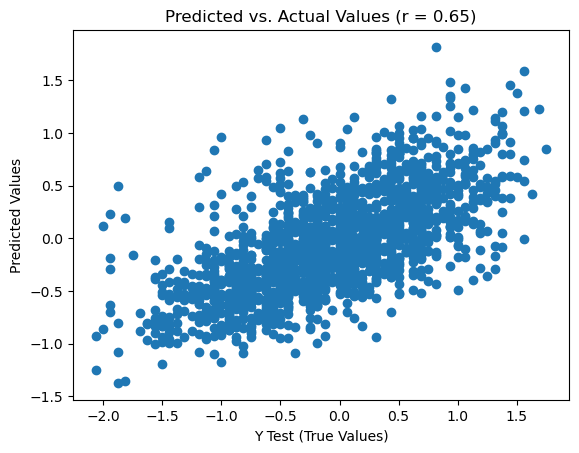

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


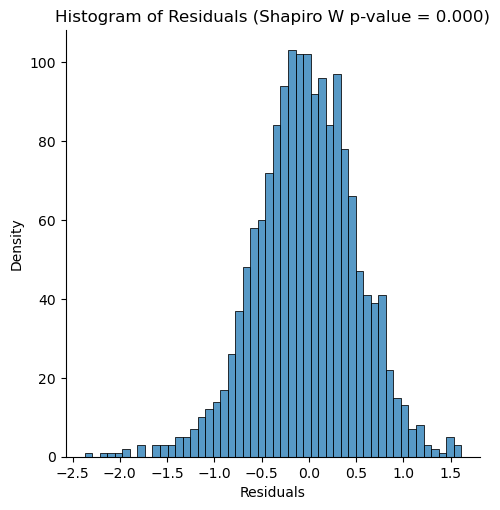

In [18]:
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()

### Performance Metrics

In [19]:
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.417
1        MSE  0.285
2       RMSE  0.534
3  R-Squared  0.428


## Multiple Linear Regression
Using multiple features as independant variable

In [20]:
# Fit the model with all features of x
model.fit(x_train, y_train)

LinearRegression()

### Prediction

In [21]:
# Generate a prediction based on the training data
predictions = model.predict(x_test) 

### Plot

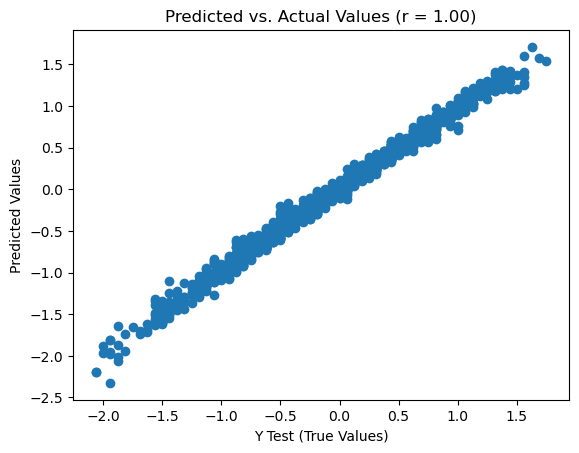

In [22]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


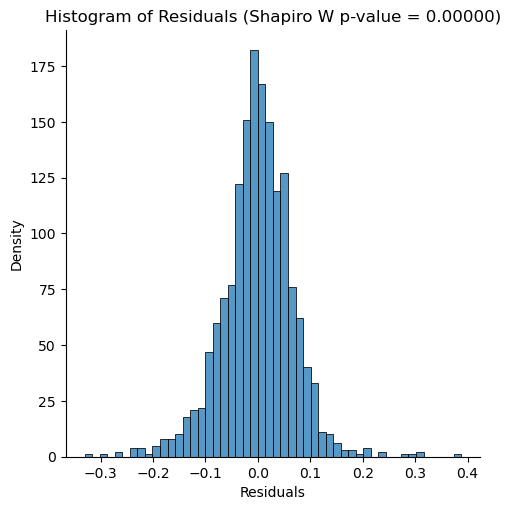

In [23]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.5f})'.format(shapiro(y_test -predictions)[1]))
plt.show()

### Performance Metrics

In [24]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.068
3  R-Squared  0.991


## Conclusion

Using simple linear regression, it produces a subpar results:

1. MSE = 0.285
2. RMSE = 0.534
3. R-Squared = 0.428

Decent MSE and RMSE is acquired but very low R-Squared of only 42.8% confidence of the outcome. Based on the scatterplot and histogram of residuals, a better result could be achieved if multiple features are used.

When applying multiple linear regression (using all features), the model produces a very good result:

1. MSE = 0.005
2. RMSE = 0.068
3. R-Squared = 0.991

However, this could be the consequence of overfitting or over-processed of the dataframe. Based on the graphs (scatterplot with r=1.00), it is highly likely the case of overfitting. Hence, further testing with other prediction models is required.